<a href="https://colab.research.google.com/github/nilmarlanna/encryptionModeCBC/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto em itálico*# Acidentes 

1.   Item da lista
2.   Item da lista

de trabalho

---


## Contextualização do Problema: 
O mercado de trabalho possui uma grande 
diversidade de pessoas, de diferentes realidades socioeconômicas e culturas. Com tantas pessoas trabalhando nos mais variados contextos,
ocorrem inúmeros acidentes do trabalho que muitas vezes podem ser fatais ou deixam sequelas
graves. Em alguns casos, apesar de não serem graves, podem impossibilitar de trabalhar, por
um certo período, a pessoa responsável por manter a família. Com uma base de dados adequada
sobre acidentes dos últimos anos podemos descobrir quais profissões e quais motivos mais
envolvidos nos acidentes afins de criar uma proposta de projeto para atenuação do problema.
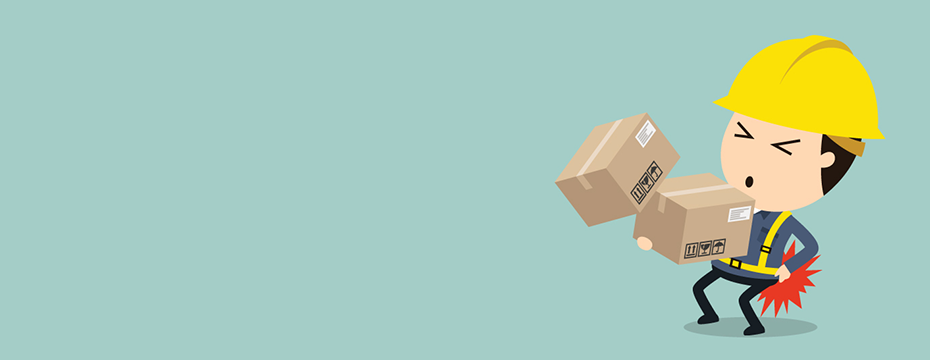



---



## Base(s) de Dados utilizada(s):
https://www.gov.br/previdencia/pt-br/assuntos/saude-e-seguranca-dotrabalhador/dados-de-acidentes-do-trabalho
https://ces.ibge.gov.br/base-de-dados/links-base-de-dados.html



---



## Qual o seu objetivo (qual a contribuição pretendida)?

Analisar os dados das quais profissões tendem a sofrer mais acidentes classificados pelos 3
motivos (Típico, Trajeto e Doença do trabalho), e relatar como pode ser evitado.Desenvolvemos graficos de barras para analisar as profissões que mais estão
sendo impactada. Podemos também utilizar o Google Colab e montarmos uma regressão linear
com a linguagem de programação Python para analisar a curva de crescimento desse problema. Utilizamos os pacotes para aplicar graficos e um algoritmo de Machine Learning.



---



## Análise Exploratória dos Dados

Carregando os dados a partir de um arquivo local
Utilizamos um arquivo do excel cujo nome é '19Act01_01'. Esse arquivo foi baixo da base de dados especificada acima. No documento há várias planilhas e cada uma delas foi convertida em um arquivo CSV. Nesses arquivos encontramos dados sobre os acidentes de trabalho dos anos de 2017, 2018 e 2019. Esses dados estão classificados em:

Com CAT registrada ou Sem CAT registrada; Pelo motivo (tipico, de trajeto ou doença do trabalho); Pela subclasse da profissão de acordo com o CNAE.

O CNAE divide as profissões em classes de A a U de acordo com o nincho de atuação. Essas classes possuem subdivisões que são codificadas por números.

Nosso primeiro passo foi inserir todos os dados em uma única tabela, 'dadoscmplt'.


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
%matplotlib inline

In [ ]:
dados2017 = "dados_2017.csv"
df_dados2017 = pd.read_csv(dados2017)
df_dados2017

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,15454,1254,13801,1535,118,33
1,B,3415,377,2777,398,240,16
2,C,125487,17849,102168,19522,3797,257
3,D,2386,191,1699,607,80,6
4,E,10970,1249,9332,1491,147,11
5,F,25640,4894,20895,4399,346,21
6,G,70120,8809,48297,20820,1003,94
7,H,38455,6287,29323,7972,1160,33
8,I,15802,1840,11413,4154,235,5
9,J,4835,511,2665,2068,102,32


In [ ]:
dados2018 = "dados_2018.csv"
df_dados2018 = pd.read_csv(dados2018)
df_dados2018

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,15721,1231,14120,1481,120,33
1,B,3556,411,3021,429,106,16
2,C,135953,18487,111149,20983,3821,257
3,D,2241,193,1568,597,76,6
4,E,12315,1238,10488,1726,101,11
5,F,25900,4572,21115,4450,335,21
6,G,75976,9125,52779,22203,994,94
7,H,37387,6150,28124,8295,968,33
8,I,16829,2023,12354,4266,209,5
9,J,5464,595,3025,2352,87,32


In [ ]:
dados2019 = "dados_2019.csv"
df_dados2019 = pd.read_csv(dados2019)
df_dados2019

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,16297,1157,14701,1460,136,33
1,B,3951,401,3417,399,135,16
2,C,135515,16978,112829,19657,3029,257
3,D,2159,188,1533,545,81,6
4,E,12749,1150,10982,1673,94,11
5,F,26719,3925,22254,4161,304,21
6,G,77793,7577,55750,21198,845,94
7,H,34574,5606,26397,7377,800,33
8,I,17212,1552,12865,4137,210,5
9,J,5363,526,3038,2253,72,32


In [ ]:
df_dados2017.head()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,15454,1254,13801,1535,118,33
1,B,3415,377,2777,398,240,16
2,C,125487,17849,102168,19522,3797,257
3,D,2386,191,1699,607,80,6
4,E,10970,1249,9332,1491,147,11


In [ ]:
df_dados2018.head()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,15721,1231,14120,1481,120,33
1,B,3556,411,3021,429,106,16
2,C,135953,18487,111149,20983,3821,257
3,D,2241,193,1568,597,76,6
4,E,12315,1238,10488,1726,101,11


In [ ]:
df_dados2019.head()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
0,A,16297,1157,14701,1460,136,33
1,B,3951,401,3417,399,135,16
2,C,135515,16978,112829,19657,3029,257
3,D,2159,188,1533,545,81,6
4,E,12749,1150,10982,1673,94,11


In [ ]:
df_dados2017.tail()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
16,Q,67319,3461,53705,13000,614,13
17,R,1721,189,1211,481,29,13
18,S,7369,641,5044,2170,155,16
19,T,35,0,26,9,0,1
20,U,23,2,19,4,0,1


In [ ]:
df_dados2018.tail()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
16,Q,71531,3828,56575,4410,546,13
17,R,1646,204,1227,397,22,13
18,S,7615,692,5313,2168,134,16
19,T,30,1,22,8,0,1
20,U,23,2,17,6,0,1


In [ ]:
df_dados2019.tail()

,Classe,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
16,Q,73548,3894,59206,13685,657,13
17,R,1672,153,1247,403,22,13
18,S,7556,569,5429,1999,128,16
19,T,20,0,16,4,0,1
20,U,25,2,16,9,0,1


In [ ]:
# Verificando o formato dos dados
df_dados2017.shape

(21, 7)

In [ ]:
# Verificando o formato dos dados
df_dados2018.shape

(21, 7)

In [ ]:
# Verificando o formato dos dados
df_dados2019.shape

(21, 7)

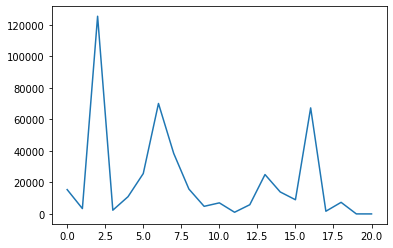

In [ ]:
df_dados2017["ComCAT"].plot()

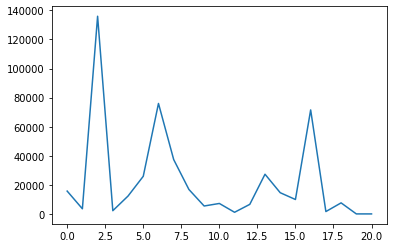

In [ ]:
df_dados2018["ComCAT"].plot()

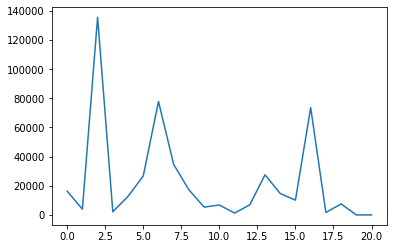

In [ ]:
df_dados2019["ComCAT"].plot()

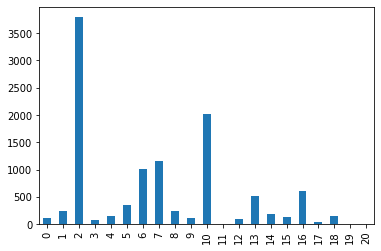

In [ ]:
df_dados2017["DoencaDoTrabalho"].plot.bar()

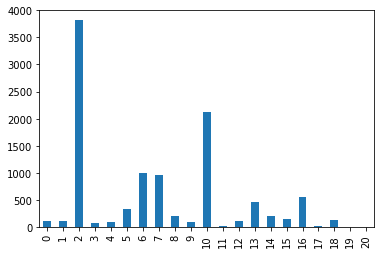

In [ ]:
df_dados2018["DoencaDoTrabalho"].plot.bar()

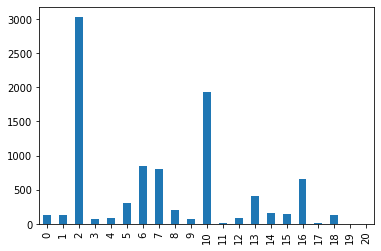

In [ ]:
df_dados2019["DoencaDoTrabalho"].plot.bar()

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=7):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

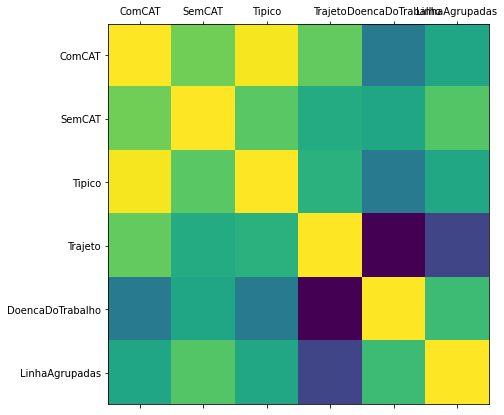

In [ ]:
# Criando o gráfico
plot_corr(df_dados2017)

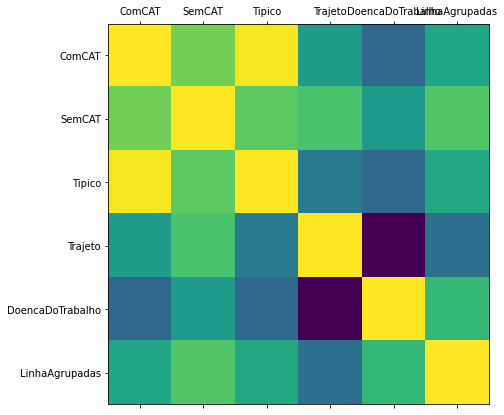

In [ ]:
# Criando o gráfico
plot_corr(df_dados2018)

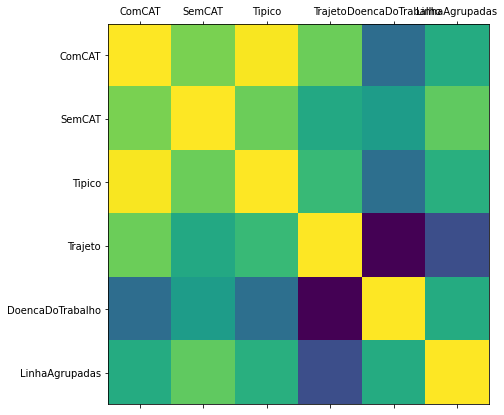

In [ ]:
# Criando o gráfico
plot_corr(df_dados2019)

In [ ]:
df_dados2017.corr()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
ComCAT,1.000000,0.927506,0.995498,0.919153,0.801104,0.861621
SemCAT,0.927506,1.000000,0.914267,0.871203,0.863477,0.909712
Tipico,0.995498,0.914267,1.000000,0.878580,0.802493,0.864673
Trajeto,0.919153,0.871203,0.878580,1.000000,0.664861,0.734921
DoencaDoTrabalho,0.801104,0.863477,0.802493,0.664861,1.000000,0.894858
LinhaAgrupadas,0.861621,0.909712,0.864673,0.734921,0.894858,1.000000


In [ ]:
df_dados2018.corr()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
ComCAT,1.000000,0.932536,0.995582,0.855913,0.787465,0.867986
SemCAT,0.932536,1.000000,0.920063,0.908331,0.853435,0.913367
Tipico,0.995582,0.920063,1.000000,0.812197,0.790085,0.873686
Trajeto,0.855913,0.908331,0.812197,1.000000,0.680381,0.798678
DoencaDoTrabalho,0.787465,0.853435,0.790085,0.680381,1.000000,0.893653
LinhaAgrupadas,0.867986,0.913367,0.873686,0.798678,0.893653,1.000000


In [ ]:
df_dados2019.corr()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
ComCAT,1.000000,0.928108,0.996153,0.920299,0.771106,0.862323
SemCAT,0.928108,1.000000,0.920172,0.858383,0.840235,0.912799
Tipico,0.996153,0.920172,1.000000,0.883103,0.772622,0.868769
Trajeto,0.920299,0.858383,0.883103,1.000000,0.642816,0.728328
DoencaDoTrabalho,0.771106,0.840235,0.772622,0.642816,1.000000,0.862510
LinhaAgrupadas,0.862323,0.912799,0.868769,0.728328,0.862510,1.000000


In [ ]:
# Resumo do Dataframe
df_dados2017.describe()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,21475.952381,2942.523810,16151.095238,4802.809524,522.047619,31.857143
std,31096.470812,4231.872713,24763.898713,6228.677080,897.445958,55.451137
min,23.000000,0.000000,19.000000,4.000000,0.000000,1.000000
25%,3415.000000,377.000000,2665.000000,607.000000,95.000000,9.000000
50%,9016.000000,1249.000000,6213.000000,2170.000000,155.000000,16.000000
75%,25004.000000,3829.000000,13801.000000,4399.000000,507.000000,33.000000
max,125487.000000,17849.000000,102168.000000,20820.000000,3797.000000,257.000000


In [ ]:
# Resumo do Dataframe
df_dados2018.describe()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,22809.523810,3031.047619,17173.952381,4656.190476,503.190476,31.857143
std,33511.325965,4364.856819,26734.911093,6369.867876,908.644794,55.451137
min,23.000000,1.000000,17.000000,6.000000,0.000000,1.000000
25%,3556.000000,411.000000,2838.000000,597.000000,87.000000,9.000000
50%,9935.000000,1231.000000,6790.000000,2352.000000,134.000000,16.000000
75%,25900.000000,3839.000000,14193.000000,4410.000000,460.000000,33.000000
max,135953.000000,18487.000000,111149.000000,22203.000000,3821.000000,257.000000


In [ ]:
# Resumo do Dataframe
df_dados2019.describe()

,ComCAT,SemCAT,Tipico,Trajeto,DoencaDoTrabalho,LinhaAgrupadas
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,22977.000000,2744.857143,17688.523810,4847.000000,441.476190,31.857143
std,33654.360301,3958.947250,27352.910459,6339.258064,742.637436,55.451137
min,20.000000,0.000000,16.000000,4.000000,0.000000,1.000000
25%,3951.000000,401.000000,2785.000000,545.000000,81.000000,9.000000
50%,10144.000000,1150.000000,7211.000000,2253.000000,136.000000,16.000000
75%,26719.000000,3894.000000,15163.000000,4161.000000,412.000000,33.000000
max,135515.000000,16978.000000,112829.000000,21198.000000,3029.000000,257.000000


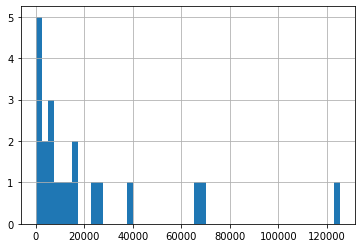

In [ ]:
df_dados2017['ComCAT'].hist(bins=50)

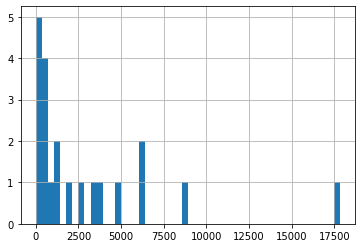

In [ ]:
df_dados2017['SemCAT'].hist(bins=50)

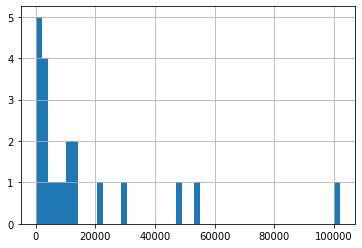

In [ ]:
df_dados2017['Tipico'].hist(bins=50)

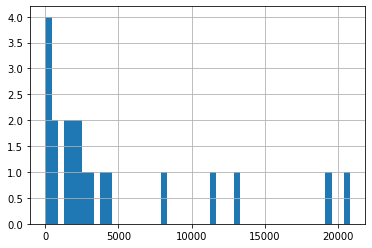

In [ ]:
df_dados2017['Trajeto'].hist(bins=50)

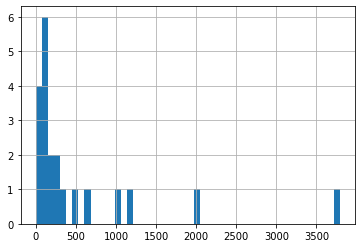

In [ ]:
df_dados2017['DoencaDoTrabalho'].hist(bins=50)

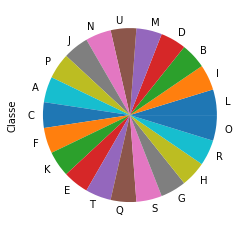

In [ ]:
df_dados2017['Classe'].value_counts().plot.pie()